# Whats your pet breed?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/chihuahua_114.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/keeshond_41.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/keeshond_162.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/keeshond_167.jpg'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/oxford-iiit-pet/images/staffordshire_bull_terrier_94.jpg')]

In [9]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

## Training: resnet50

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

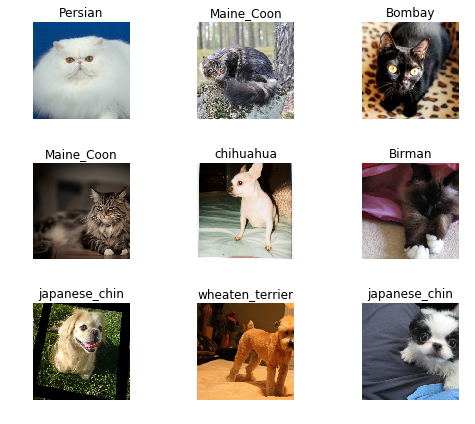

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [16]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 73321781.69it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


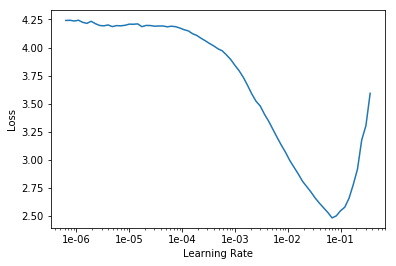

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,1.944135,0.527303,0.151386
2,0.847898,0.333160,0.115139
3,0.469789,0.270635,0.085288
4,0.306770,0.264338,0.089552
5,0.217582,0.223461,0.059701
6,0.151650,0.216575,0.078891
7,0.114724,0.223657,0.070362
8,0.087037,0.218160,0.072495


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.079988,0.218445,0.063966
2,0.078441,0.233537,0.072495
3,0.073915,0.224588,0.072495


In [19]:
learn.save('stage-1-50')

In [23]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3)]

In [25]:
!pwd

/notebooks/course-v3/nbs/dl1


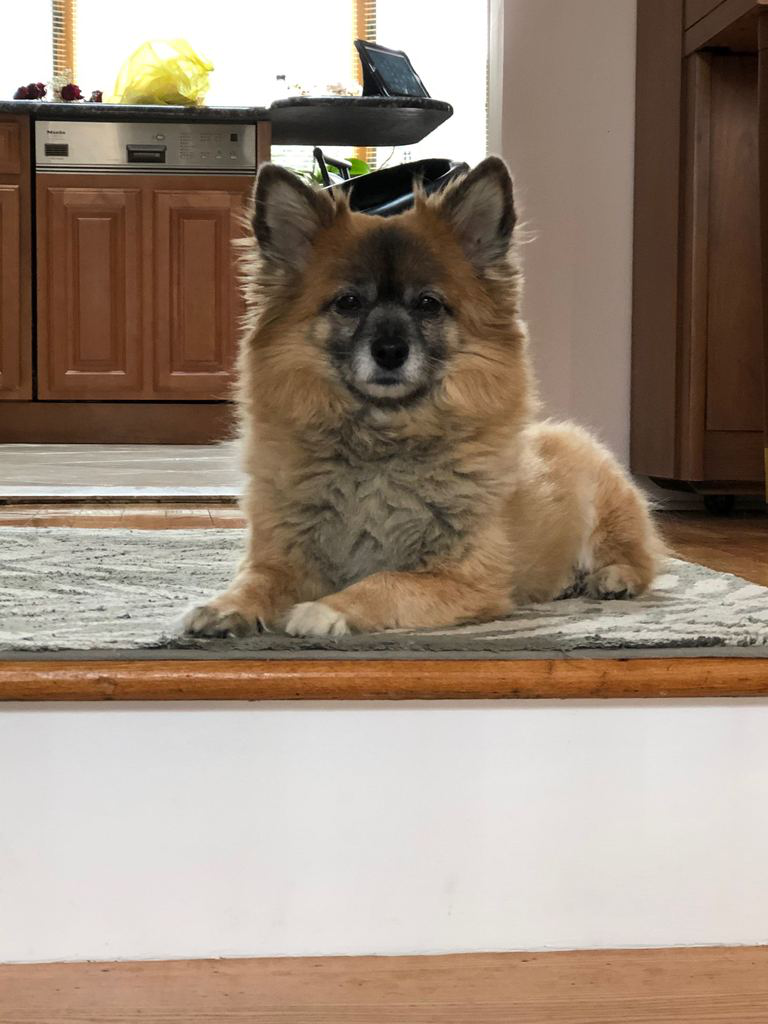

In [35]:
img = open_image('/notebooks/course-v3/nbs/dl1/00000024.jpg')
img

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category pomeranian